In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('smartphones.csv')
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹ 54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹ 19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹ 16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹ 14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹ 24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


### Data Assessing -

#### Quality Issues

1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' `validity`
3. **price** - has ',' between numbers `validity`
4. **price** - phone Namotel has a price of 99 `accuracy`
5. **ratings** - missing values `completeness`
6. **processor** - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
7. There is ipod on row 756 `validity`
8. **memory** - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
9. **battery** - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
10. **display** - sometimes frequency is not available `completeness`
11. **display** - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
12. certain phones are foldable and the info is scattered `validity`
13. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
14. **camera** - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016) `validity`
15. **card** - sometimes contains info about os and camera `validity`
16. **os** - sometimes contains info about bluetooth and fm radio `validity`
17. **os** - issue with rows (324,378) `validity`
18. **os** - sometimes contains os version name like lollipop `consistency`
19. missing values in camera, card and os `completeness`
20. datatype  of price and rating is incorrect `validity`



#### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto

### Programmatic Assessment -

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [6]:
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [7]:
df.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [8]:
df.duplicated().sum()

np.int64(0)

- at this point programmatic assessment might not seem so beneicial
- it will be better after a ceratin level of cleaning 
- iterative process

### Cleaning (1-A phase)- 

In [9]:
df1 = df.copy()
df1.head()
df

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹ 54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹ 19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹ 16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹ 14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹ 24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,"₹ 34,990",83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,"₹ 14,990",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),"₹ 28,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,"₹ 19,990",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [10]:
# removing rupee symbol, comma and typecasting price col
df1['price'] = df1['price'].str.replace('₹',"").str.replace(',','').astype('int')

In [11]:
# for the observations written above and row number to match -
# reseting the index to match with csv ones
df1 = df1.reset_index().rename(columns = {'level_0':'index'})
df1['index'] +=2
df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [12]:
processor_rows = set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
ram_rows = set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows = set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows = set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows = set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,
750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016))

In [13]:
# boolean series of all problematic rows -
df1['index'].isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Name: index, Length: 1020, dtype: bool

In [14]:
df1[df1['index'].isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
...,...,...,...,...,...,...,...,...,...,...,...,...
954,956,Vivo X Fold 5G (12GB RAM + 512GB),118990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 512 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
988,990,Nokia 5310 Dual Sim,3399,NaN,Dual Sim,"8 MB RAM, 16 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser
993,995,Huawei Mate X,169000,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Kirin 990, Octa Core, 2.86 GHz Processor","8 GB RAM, 512 GB inbuilt",4500 mAh Battery with 55W Fast Charging,"8 inches, 2200 x 2480 px Display",Foldable Display,48 MP Quad Rear Camera,"Memory Card (Hybrid), upto 256 GB"
1000,1002,XTouch F40 Flip,1999,NaN,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera


In [15]:
# finding the ones where all have an issue -
x = df1[df1['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]
x

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
640,642,Nokia 105 Plus,1299,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
647,649,Motorola Moto A10,1339,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
657,659,Zanco Tiny T1,2799,NaN,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN
665,667,itel it2163S,958,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
748,750,Nokia 400 4G,3290,NaN,"Dual Sim, 4G, VoLTE, Wi-Fi",2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear & 0.3 MP Front Camera,"Memory Card Supported, upto 64 GB",Bluetooth,Browser,NaN
757,759,Karbonn KU3i,995,NaN,Dual Sim,"52 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",Bluetooth,NaN
817,819,itel Magic X,2239,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"48 MB RAM, 128 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB"
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [16]:
x['price'].mean()

np.float64(2537.6923076923076)

- on analyzing this part of the data we get to know that there is clearly a shifting problem processor -> ram -> battery onwards
- also we can conclude all the phones with this issues have a price around 2500-3000, also by looking at the model names we can find that they are mostly feature phones

- this is obviously a smartphones dataset and hence, these values aren't required and act as outliers which need to be removed
- let't not directly use the 2500-3000 range to remove the features as there might be other possiblities where the details aren't having the above stated shifting problem
- hence, consider a safer value and analyze the data for finding an appropraite price value above which you wonn't find any feature phones

- after multiple trial and errors we find an appropriate value -

In [17]:
p = 3400
print(df1[df1['price'] < p].shape[0])
df1[df1['price'] < p]

29


,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
400,402,Jio JioPhone 2,2999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Dual Core, 1 GHz Processor","512 MB RAM, 4 GB inbuilt",2000 mAh Battery,"2.4 inches, 320 x 240 px Display",2 MP Rear & 0.3 MP Front Camera,"Memory Card Supported, upto 128 GB",KAI OS
473,475,Nokia 110 4G,1762,NaN,"Dual Sim, 3G, 4G, VoLTE",No Wifi,"128 MB RAM, 48 MB inbuilt",1020 mAh Battery,"1.8 inches, 120 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",NaN
532,534,Samsung Guru Music 2 Dual Sim,1949,NaN,Dual Sim,No Wifi,"Single Core, 208 MHz Processor",800 mAh Battery,"2 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",NaN
533,535,Itel MagicX Pro,2799,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",1 GHz Processor,"64 MB RAM, 128 MB inbuilt",2500 mAh Battery,"2.4 inches, 320 x 240 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 64 GB",Bluetooth
551,553,itel Magic 2 4G,2399,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"64 MB RAM, 128 MB inbuilt",1900 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB"
573,575,Nokia 105 (2019),1299,NaN,Single Sim,No Wifi,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 120 x 160 px Display",No Rear Camera,NaN,NaN
575,577,Lyf C459,1999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon MSM8909, Quad Core, 1.1 GHz Processor","1 GB RAM, 8 GB inbuilt",2000 mAh Battery,"4.5 inches, 480 x 854 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 32 GB",Android v6.0 (Marshmallow)
608,610,Namotel Achhe Din,99,NaN,"Dual Sim, 3G, Wi-Fi","1 GB RAM, 4 GB inbuilt",1325 mAh Battery,"4 inches, 720 x 1280 px Display",2 MP Rear & 0.3 MP Front Camera,Android v5.0 (Lollipop),Bluetooth,NaN
611,613,Eunity U1 5605N,699,NaN,Dual Sim,No 3G,"Dual Core, 500 MHz Processor","32 MB RAM, 32 MB inbuilt",3000 mAh Battery,"1.8 inches, 128 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 16 GB"
640,642,Nokia 105 Plus,1299,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN


In [18]:
df1 = df1[df1['price'] >= p]

In [19]:
df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,1018,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


- now if we circle back and check for the problematic phones -

In [20]:
df1[df1['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)].shape[0]
#  13 -> 3

3

In [21]:
df1[df1['index'].isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)].shape[0]
# 68 -> 47

47

- a good amount of chunk of bad data is removed now, we need to individually study the columns

### Cleaning (1-B phase)- 

##### processor_rows

In [22]:
df1[df1['index'].isin(processor_rows)]
# checking for each of these four phones we come to knoow that these are again feature phones
# so no point in keeping them in the data

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
857,859,LG Folder 2,11999,NaN,"Single Sim, 3G, 4G, Wi-Fi","1 GB RAM, 8 GB inbuilt",1470 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [23]:
df1.drop([645,857,882,925], inplace = True)

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\3912304024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([645,857,882,925], inplace = True)


In [24]:
df1[df1['index'].isin(processor_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os


##### ram_rows

In [25]:
df1[df1['index'].isin(ram_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


In [26]:
df1.drop(582, inplace = True)

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\2835998753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(582, inplace = True)


In [27]:
df1[df1['index'].isin(ram_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0


##### battery_rows

In [28]:
print(df1[df1['index'].isin(battery_rows)].shape[0])
df1[df1['index'].isin(battery_rows)]
# shifting req towards right by one col from battery onwards

13


,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
376,378,Nokia 2660 Flip,4649,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
754,756,Apple iPod Touch (7th Gen),18900,NaN,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio


In [29]:
df1.drop([376], inplace = True)
# feature phone

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\1806289054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([376], inplace = True)


In [30]:
temp_df = df1[df1['index'].isin(battery_rows)]
z = temp_df.iloc[:,7:]

In [31]:
req_idx = z.index
req_idx

Index([111, 149, 307, 363, 439, 448, 628, 754, 762, 853, 913, 914], dtype='int64')

In [32]:
z = z.shift(1,axis =1)
z

,battery,display,camera,card,os
111,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
754,None,8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth
762,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0


In [33]:
t = z.values
t

array([[None,
        '6.1 inches, 1170\u2009x\u20092532\u2009px Display with Large Notch',
        '12\u2009MP + 12\u2009MP Dual Rear & 12\u2009MP Front Camera',
        'Memory Card Not Supported', 'iOS v14'],
       [None, '5.4 inches, 1080\u2009x\u20092340\u2009px Display',
        '12\u2009MP + 12\u2009MP Dual Rear & 12\u2009MP Front Camera',
        'Memory Card Not Supported', 'iOS v14'],
       [None,
        '6.1 inches, 1170\u2009x\u20092532\u2009px Display with Large Notch',
        '12\u2009MP + 12\u2009MP Dual Rear & 12\u2009MP Front Camera',
        'Memory Card Not Supported', 'iOS v14'],
       [None, '5.4 inches, 1080\u2009x\u20092340\u2009px Display',
        '12\u2009MP + 12\u2009MP Dual Rear & 12\u2009MP Front Camera',
        'Memory Card Not Supported', 'iOS v14'],
       [None, '4.7 inches, 750\u2009x\u20091334\u2009px Display',
        '12\u2009MP Rear & 7\u2009MP Front Camera',
        'Memory Card Not Supported', 'iOS v15'],
       [None,
        '6.06 inches,

In [34]:
y = (df1.loc[req_idx]).iloc[:,7:]
print(y.shape)
y
# this is the part which needs to be changed

(12, 5)


,battery,display,camera,card,os
111,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
439,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
754,8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser
762,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio
853,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio


In [35]:
# This single statement is reliable and future-proof
# using this gave a warning and wasn't allowing to edit permanently as it is a chained operation - (df1.loc[req_idx]).iloc[:,7:]
df1.loc[req_idx, df1.columns[7:]] = t

In [36]:
(df1.loc[req_idx]).iloc[:,7:]
# df1 is now updated

,battery,display,camera,card,os
111,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
754,None,8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth
762,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0


##### display_rows

In [37]:
print(len(display_rows))
print(df1[df1['index'].isin(display_rows)].shape[0])
(df1[df1['index'].isin(display_rows)])

27
6


,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
914,916,Apple iPhone 12 (256GB),67999,76.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


- clearly working on the previous one sorted all the issues for this as well

##### camera_rows

In [38]:
# dropping ipod(obv not req in smartphones) -
df1.drop(754, inplace = True)

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\1774338422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(754, inplace = True)


In [39]:
print(len(camera_rows))
print(df1[df1['index'].isin(camera_rows)].shape[0])

64
39


In [40]:
m = (df1[df1['index'].isin(camera_rows)])
m

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


In [41]:
m[m['price'] < 7000]
# nokia models are feature phones

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
856,858,Samsung Galaxy A01 Core,4999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","(28 nm), Quad Core, 1.5 GHz Processor","1 GB RAM, 16 GB inbuilt",3000 mAh Battery,"5.3 inches, 720 x 1480 px Display",8 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v10


In [42]:
df1.drop([155,271], inplace = True)

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\2231783382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([155,271], inplace = True)


In [43]:
m = (df1[df1['index'].isin(camera_rows)])
m
# wherever one finds dual/foldable display there is a shifting issue there
# card info should be in camera

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display","Foldable Display, Dual Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB"
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [44]:
a = ['Dual Display','Foldable Display','Foldable Display, Dual Display']
x = m[m['camera'].isin(a)]
# these are all the problematic rows
x

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display","Foldable Display, Dual Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB"
365,367,OPPO Find N Flip,89990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000, Octa Core, 3.05 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported
392,394,OPPO Find N2 Flip,70990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported
482,484,Vivo X Fold Plus,113990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4730 mAh Battery with 80W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera,Android v12
504,506,Samsung Galaxy Z Flip 4 5G,89999,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported


In [45]:
req_idx = x.index
req_idx

Index([  98,  159,  236,  306,  321,  322,  365,  392,  482,  504,  569,  570,
        613,  682,  703,  709,  721,  726,  790,  844,  894,  943,  954,  993,
       1014],
      dtype='int64')

In [46]:
df1.loc[req_idx,'camera'] = x['card'].values
print(df1.loc[req_idx].shape[0])
df1.loc[req_idx]

25


,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,50 MP Quad Rear & 16 MP Front Camera,Android v12
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 256 GB"
365,367,OPPO Find N Flip,89990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000, Octa Core, 3.05 GHz Processor","8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported
392,394,OPPO Find N2 Flip,70990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 44W Fast Charging,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...",50 MP + 8 MP Dual Rear & 32 MP Front Camera,50 MP + 8 MP Dual Rear & 32 MP Front Camera,Memory Card Not Supported
482,484,Vivo X Fold Plus,113990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4730 mAh Battery with 80W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display wi...",50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera,50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera,Android v12
504,506,Samsung Galaxy Z Flip 4 5G,89999,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported


##### card and os_rows

In [47]:
# card col has camera values still
df1[df1['card'].str.contains('MP')].shape[0]

26

In [48]:
df1['card'].value_counts()
# lets replace all mp values with card not supported val as on analyzing most of the phones with that problem
# we realise that these are high-end sammrtphones of high cost made for specific purposes like gaming, computational works, etc.
# and such phones usually do not support a memory card

card
Memory Card Supported, upto 1 TB                                       171
Memory Card Not Supported                                              123
Android v12                                                            107
Memory Card Supported, upto 512 GB                                     105
Memory Card (Hybrid), upto 1 TB                                         91
Memory Card Supported                                                   89
Memory Card Supported, upto 256 GB                                      87
Android v13                                                             46
Android v11                                                             41
Memory Card (Hybrid)                                                    30
Memory Card (Hybrid), upto 256 GB                                       13
Memory Card (Hybrid), upto 512 GB                                       11
Android v10                                                             11
Memory Card Supporte

In [49]:
df1.loc[req_idx, 'card'] = 'Memory Card Not Supported'
df1.loc[req_idx].head()

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,Memory Card Not Supported,Android v12
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Memory Card Not Supported,Android v12
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported,Memory Card Not Supported
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Memory Card Not Supported,Android v12


In [50]:
df1[df1['card'].str.contains('MP')]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
69,71,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12


In [51]:
df1.loc[69,'card'] = 'Memory Card Not Supported'

In [52]:
df1[df1['card'].str.contains('MP')]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os


In [53]:
df1['card'].value_counts()
# now card col val are into two categories basically one which contains the word card and one which does not

card
Memory Card Supported, upto 1 TB       171
Memory Card Not Supported              149
Android v12                            107
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Android v13                             46
Android v11                             41
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Android v10                             11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Android v9.0 (Pie)                       2
Android v12.1                            1
Memory Card Supported, upto 1000 GB      1
iOS v10                                  1
Android v10.0                            1
iOS v1

In [54]:
dff = df1[~(df1['card'].str.contains('Card'))]
dff

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
8,10,Nothing Phone 1,26749,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio
9,11,OnePlus Nord 2T 5G,28999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio
12,14,Xiaomi Redmi Note 12 Pro 5G,24762,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
17,19,OPPO Reno 9 Pro Plus,45999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v13,No FM Radio
18,20,OnePlus 10R 5G,32999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Bluetooth
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1011,Xiaomi Civi 3,32990,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2400 px, 120 Hz Display wit...",64 MP + 20 MP + 2 MP Triple Rear & 32 MP + 32 ...,Android v13,No FM Radio
1011,1013,Oppo Find X6,69990,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP Fron...,Android v12,No FM Radio
1012,1014,itel A23s,4787,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,No FM Radio
1013,1015,Google Pixel 8 Pro,70990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor 3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 12 MP Fron...,Android v13,No FM Radio


In [55]:
df1[~(df1['card'].str.contains('Card'))]['os'].value_counts()
# clearly these are wrong values and they need to be replaced with the correct ones stored in inccorect column of card

os
No FM Radio    180
Bluetooth       33
Name: count, dtype: int64

In [56]:
df1.loc[dff.index, 'os'] = dff['card'].values
df1.loc[dff.index]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
8,10,Nothing Phone 1,26749,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,Android v12
9,11,OnePlus Nord 2T 5G,28999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,Android v12
12,14,Xiaomi Redmi Note 12 Pro 5G,24762,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Android v12
17,19,OPPO Reno 9 Pro Plus,45999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v13,Android v13
18,20,OnePlus 10R 5G,32999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Android v12
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1011,Xiaomi Civi 3,32990,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2400 px, 120 Hz Display wit...",64 MP + 20 MP + 2 MP Triple Rear & 32 MP + 32 ...,Android v13,Android v13
1011,1013,Oppo Find X6,69990,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP Fron...,Android v12,Android v12
1012,1014,itel A23s,4787,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,Android v11,Android v11
1013,1015,Google Pixel 8 Pro,70990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor 3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 12 MP Fron...,Android v13,Android v13


In [57]:
df1[~(df1['card'].str.contains('Card'))]['card'].value_counts()
# now, these values still need to be treated

card
Android v12           107
Android v13            46
Android v11            41
Android v10            11
Android v9.0 (Pie)      2
Android v12.1           1
iOS v10                 1
Android v10.0           1
iOS v13                 1
HarmonyOS v2.0          1
HarmonyOS               1
Name: count, dtype: int64

In [58]:
reqidx = df1[~(df1['card'].str.contains('Card'))].index

In [59]:
df1.loc[reqidx,'card'] = 'Memory Card Not Supported'

In [60]:
df1['card'].value_counts()

card
Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: count, dtype: int64

In [61]:
df1['os'].value_counts()
# these values as well -
# Memory Card Not Supported               6
# Memory Card (Hybrid), upto 2 TB         2
# Memory Card Supported, upto 256 GB      2
# Memory Card (Hybrid), upto 256 GB       2
# Bluetooth                               1
# Memory Card (Hybrid)                    1
# Memory Card Supported, upto 128 GB      1

os
Android v12                           394
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
Memory Card Not Supported               6
Android v8.0 (Oreo)                     4
Android v11.0                           4
iOS v13                                 4
iOS v15.0                               3
Memory Card (Hybrid), upto 2 TB         2
Memory Card Supported, upto 256 GB      2
Android v5.1.1 (Lollipop)               2
Android v12.1                           2
HarmonyOS v2.0                          2
iOS v14.0                               2
EMUI v12                                2
Android v6.0 (Marshmallow)              2
Memory Card (Hybrid), upto 256 

In [62]:
df1[df1['os'].str.contains('Bluetooth')].index

Index([486], dtype='int64')

In [63]:
df1.loc[486,'os'] = 'Bluetooth'

In [64]:
idx = df1[df1['os'].str.contains('Card')].index
idx

Index([159, 306, 322, 365, 392, 504, 570, 613, 682, 721, 726, 844, 894, 993], dtype='int64')

In [65]:
df1.loc[idx,'os'] = np.nan
df1.loc[486,'os'] = np.nan

##### checking via programmatic assesment -

In [373]:
df1['sim'].value_counts()

sim
Dual Sim, 3G, 4G, VoLTE, Wi-Fi                               317
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC                      268
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi                           155
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster                54
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Blaster           52
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster                    46
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC                           46
Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC                  7
Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC                      7
Dual Sim, 3G, 4G, Wi-Fi                                        7
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster                5
Single Sim, 3G, 4G, VoLTE, Wi-Fi, NFC                          4
Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi                       3
Single Sim, 3G, 4G, VoLTE, Wi-Fi                               3
Dual Sim, 3G, 4G, Wi-Fi, NFC                                   2
Single Sim, 3G, 4G, W

In [376]:
df1['processor'].value_counts()

processor
Snapdragon 695, Octa Core, 2.2 GHz Processor        43
Snapdragon 680, Octa Core, 2.4 GHz Processor        41
Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor    38
Snapdragon 8 Gen1, Octa Core, 3 GHz Processor       35
Dimensity 700 5G, Octa Core, 2.2 GHz Processor      32
                                                    ..
Octa Core, 1.8 GHz Processor                         1
Snapdragon 710, Octa Core, 2.2 GHz Processor         1
Exynos 7885, Octa Core, 2.2 GHz Processor            1
Snapdragon 425, Quad Core, 1.2 GHz Processor         1
Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor     1
Name: count, Length: 207, dtype: int64

In [ ]:
df1[~(df1['processor'].str.contains('Processor'))]
# its correct hence

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
152,154,Apple iPhone 15 Pro Max,142990,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 256 GB inbuilt",4352 mAh Battery with 25W Fast Charging,"6.68 inches, 1284 x 2778 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
263,265,Apple iPhone XR2,71999,60.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",Apple A13,"4 GB RAM, 64 GB inbuilt",3060 mAh Battery with Fast Charging,"6.1 inches, 828 x 1792 px Display",12 MP + 5 MP Dual Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v12.3
282,284,Apple iPhone 14 Mini,69990,70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",Bionic A16,"6 GB RAM, 128 GB inbuilt",3500 mAh Battery with Fast Charging,"5.42 inches, 1080 x 2340 px Display with Punch...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v15
429,431,Nokia X50 5G,34999,76.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",Snapdragon 775,"6 GB RAM, 64 GB inbuilt",6000 mAh Battery with 33W Fast Charging,"6.81 inches, 1080 x 2400 px Display with Punch...",108 MP Quad Rear & 32 MP Front Camera,Memory Card Supported,Android v11
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
627,629,Nokia 225 4G,3589,NaN,"Dual Sim, 3G, 4G, VoLTE",Unisoc T117,"64 MB RAM, 128 MB inbuilt",1150 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",RTOS (Series 30+)
728,730,Apple iPhone 15,82990,72.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",Bionic A16,"6 GB RAM, 128 GB inbuilt",3285 mAh Battery with Fast Charging,"6.06 inches, 1170 x 2532 px Display with Punch...",50 MP + 13 MP Dual Rear & 13 MP Front Camera,Memory Card Not Supported,iOS v15


In [377]:
df1['ram'].value_counts()

ram
8 GB RAM, 128 GB inbuilt     267
6 GB RAM, 128 GB inbuilt     190
4 GB RAM, 64 GB inbuilt      143
12 GB RAM, 256 GB inbuilt     70
8 GB RAM, 256 GB inbuilt      70
4 GB RAM, 128 GB inbuilt      62
3 GB RAM, 32 GB inbuilt       37
6 GB RAM, 64 GB inbuilt       29
2 GB RAM, 32 GB inbuilt       24
3 GB RAM, 64 GB inbuilt       15
12 GB RAM, 512 GB inbuilt     10
6 GB RAM, 256 GB inbuilt       7
16 GB RAM, 256 GB inbuilt      6
1 GB RAM, 16 GB inbuilt        6
4 GB RAM, 32 GB inbuilt        6
12 GB RAM, 128 GB inbuilt      4
2 GB RAM, 64 GB inbuilt        4
2 GB RAM, 16 GB inbuilt        4
6 GB RAM, 512 GB inbuilt       4
6 GB RAM, 1 TB inbuilt         4
16 GB RAM, 512 GB inbuilt      3
4 GB RAM, 256 GB inbuilt       3
3 GB RAM, 16 GB inbuilt        2
64 GB inbuilt                  2
8 GB RAM, 512 GB inbuilt       2
18 GB RAM, 512 GB inbuilt      1
512 MB RAM, 4 GB inbuilt       1
18 GB RAM, 256 GB inbuilt      1
512 GB inbuilt                 1
64 MB RAM, 128 MB inbuilt      1
4 GB R

In [378]:
df1['battery'].value_counts()

battery
5000 mAh Battery with 33W Fast Charging      103
5000 mAh Battery with 18W Fast Charging       89
5000 mAh Battery                              74
5000 mAh Battery with 67W Fast Charging       30
5000 mAh Battery with 10W Fast Charging       28
                                            ... 
5180 mAh Battery with 10W Fast Charging        1
4500 mAh Battery with 68W Fast Charging        1
8000 mAh Battery                               1
5000 mAh Battery with 68W Fast Charging        1
5000 mAh Battery with 68.2W Fast Charging      1
Name: count, Length: 230, dtype: int64

In [387]:
df1['display'].value_counts()

display
6.67 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole    54
6.5 inches, 720 x 1600 px Display with Water Drop Notch        36
6.7 inches, 1080 x 2412 px, 120 Hz Display with Punch Hole     25
6.52 inches, 720 x 1600 px Display with Water Drop Notch       23
6.5 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole      22
                                                               ..
5.86 inches, 720 x 1520 px Display with Large Notch             1
6.43 inches, 1440 x 3200 px, 120 Hz Display with Punch Hole     1
6.6 inches, 1080 x 2400 px, 144 Hz Display                      1
6.73 inches, 1440 x 3120 px, 120 Hz Display with Punch Hole     1
6.8 inches, 1080 x 2400 px Display with Punch Hole              1
Name: count, Length: 347, dtype: int64

In [388]:
df1['camera'].value_counts()

camera
50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front Camera                  40
64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front Camera                  38
50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front Camera                  34
13 MP + 2 MP Dual Rear & 5 MP Front Camera                            23
50 MP + 2 MP + 2 MP Triple Rear & 8 MP Front Camera                   20
                                                                      ..
64 MP + 20 MP + 2 MP Triple Rear & 32 MP + 32 MP Dual Front Camera     1
50 MP + 48 MP + 32 MP Triple Rear & 32 MP Front Camera                 1
50 MP + 50 MP + 50 MP Triple Rear & 12 MP Front Camera                 1
50 MP + 50 MP + 10 MP Triple Rear & 32 MP Front Camera                 1
48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP Front Camera            1
Name: count, Length: 285, dtype: int64

In [389]:
df1['card'].value_counts()

card
Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: count, dtype: int64

In [390]:
df1['os'].value_counts()

os
Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             15
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
Android v11.0                        4
iOS v13                              4
Android v8.0 (Oreo)                  4
iOS v15.0                            3
EMUI v12                             2
Android v12.1                        2
Harmony v2.0                         2
iOS v14.0                            2
Android v5.1.1 (Lollipop)            2
Android v6.0 (Marshmallow)           2
HarmonyOS v2.0                       2
Android v4.4.2 (KitKat)              1
Android v5.1 (Lollipop)              1
iOS v12.3                            1
iOS v13.0                            1
HarmonyOS v2          

In [ ]:
# model, price, rating columns have also been properly treated
# now the 2nd phase of cleaning will take place - regarding structuring of the data

### Cleaning (2-A phase)- 

In [66]:
df1['model']
# one can clearly see that model is comprised of brandname + model name
# creating a new col with brandname

0                         OnePlus 11 5G
1             OnePlus Nord CE 2 Lite 5G
2                 Samsung Galaxy A14 5G
3                  Motorola Moto G62 5G
4                    Realme 10 Pro Plus
                     ...               
1015         Motorola Moto Edge S30 Pro
1016                        Honor X8 5G
1017    POCO X4 GT 5G (8GB RAM + 256GB)
1018               Motorola Moto G91 5G
1019             Samsung Galaxy M52s 5G
Name: model, Length: 982, dtype: object

In [67]:
df1.shape

(982, 12)

In [68]:
982*100/1020

96.27450980392157

In [69]:
pd.set_option('display.max_rows', None)
# helps to display all truncated rows (srcollable/open in text editor)

In [70]:
brand_names = df1['model'].str.split(" ").str.get(0)
brand_names

0         OnePlus
1         OnePlus
2         Samsung
3        Motorola
4          Realme
5         Samsung
6           Apple
7          Xiaomi
8         Nothing
9         OnePlus
10         Realme
11           Oppo
12         Xiaomi
13           Vivo
14        Samsung
15          Apple
16           Vivo
17           OPPO
18        OnePlus
19           Vivo
20        OnePlus
21           Vivo
22           Poco
23         Xiaomi
24           Vivo
25        Samsung
26        OnePlus
27          Apple
28           Vivo
29        OnePlus
30         Realme
31           Poco
32           Vivo
33          Apple
34        Samsung
35        Samsung
36           Oppo
37        Samsung
38         Xiaomi
39           OPPO
40        OnePlus
41         Xiaomi
42       Motorola
43         Realme
44           Vivo
45        Samsung
46         Xiaomi
47         Realme
48           Vivo
49        Samsung
50        Samsung
51           iQOO
52            Jio
53       Motorola
54         Realme
55        

In [71]:
df1.insert(1,"brand_name",brand_names)

In [72]:
df1.head()

,index,brand_name,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [73]:
df1['sim'].value_counts()

sim
Dual Sim, 3G, 4G, VoLTE, Wi-Fi                               317
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC                      268
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi                           155
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster                54
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Blaster           52
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster                    46
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC                           46
Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC                  7
Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC                      7
Dual Sim, 3G, 4G, Wi-Fi                                        7
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster                5
Single Sim, 3G, 4G, VoLTE, Wi-Fi, NFC                          4
Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi                       3
Single Sim, 3G, 4G, VoLTE, Wi-Fi                               3
Dual Sim, 3G, 4G, Wi-Fi, NFC                                   2
Single Sim, 3G, 4G, W

In [74]:
has_5g = df1['sim'].str.contains('5G')
has_nfc = df1['sim'].str.contains('NFC')
has_ir_blaster = df1['sim'].str.contains('IR Blaster')

In [75]:
df1.insert(6,'has_5g',has_5g)
df1.insert(7,'has_nfc',has_nfc)
df1.insert(8,'has_ir_blaster',has_ir_blaster)

In [76]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,ram,battery,display,camera,card,os
0,2,OnePlus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [77]:
processor_name = df1['processor'].str.split(',').str.get(0)
num_cores = df1['processor'].str.split(',').str.get(1)
processor_speed = df1['processor'].str.split(',').str.get(2)

In [78]:
df1.insert(10,'processor_name',processor_name)
df1.insert(11,'num_cores',num_cores)
df1.insert(12,'processor_speed',processor_speed)

In [79]:
df1['processor_name'] = df1['processor_name'].str.strip()
df1['brand_name'] = df1['brand_name'].str.lower()
# to get uniformity in the names

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\958014025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processor_name'] = df1['processor_name'].str.strip()
C:\Users\preet\AppData\Local\Temp\ipykernel_6204\958014025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['brand_name'] = df1['brand_name'].str.lower()


In [80]:
df1.sample(6)

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
446,448,xiaomi,Xiaomi Redmi Note 12 Pro Plus (6GB RAM + 128GB),26999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster",True,False,True,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,Octa Core,2.6 GHz Processor,"6 GB RAM, 128 GB inbuilt",4980 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v12
69,71,oppo,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,Octa Core,3.2 GHz Processor,"8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",Memory Card Not Supported,Android v12
30,32,realme,Realme 10 Pro (8GB RAM + 128GB),19999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.72 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v13
157,159,oppo,OPPO F21 Pro 5G,25969,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.43 inches, 1080 x 2400 px Display with Punch...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v12
630,632,motorola,Motorola Edge Plus,57999,89.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 865 , Octa Core, 2.84 GHz Processor",Snapdragon 865,Octa Core,2.84 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.7 inches, 1080 x 2340 px, 90 Hz Display with...",108 MP + 16 MP + 8 MP Triple Rear & 25 MP Fron...,Memory Card Not Supported,Android v10.0
673,675,samsung,Samsung Galaxy A12 (6GB RAM + 128GB),13999,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Helio P35, Octa Core, 2.3 GHz Processor",Helio P35,Octa Core,2.3 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.5 inches, 720 x 1560 px Display with Water D...",48 MP Quad Rear & 8 MP Front Camera,Memory Card Supported,Android v10


In [81]:
df1[df1['processor_name'].str.contains('Core')].iloc[:,9:13]
# we can clearly see there is a fault here - shifting by one col is req 
# proc_name, num_cores to num_cores, proc_speed

,processor,processor_name,num_cores,processor_speed
118,Octa Core Processor,Octa Core Processor,NaN,NaN
143,"Quad Core, 1.4 GHz Processor",Quad Core,1.4 GHz Processor,NaN
188,"Quad Core, 1.6 GHz Processor",Quad Core,1.6 GHz Processor,NaN
201,"Octa Core, 2 GHz Processor",Octa Core,2 GHz Processor,NaN
309,"Octa Core, 2 GHz Processor",Octa Core,2 GHz Processor,NaN
315,"Quad Core, 1.3 GHz Processor",Quad Core,1.3 GHz Processor,NaN
496,Octa Core Processor,Octa Core Processor,NaN,NaN
529,Octa Core Processor,Octa Core Processor,NaN,NaN
587,"Octa Core, 2 GHz Processor",Octa Core,2 GHz Processor,NaN
758,"Quad Core, 1.6 GHz Processor",Quad Core,1.6 GHz Processor,NaN


In [82]:
df1[df1['processor_name'].str.contains('Core')].iloc[:,10:13].shift(1,axis=1)

,processor_name,num_cores,processor_speed
118,None,Octa Core Processor,NaN
143,None,Quad Core,1.4 GHz Processor
188,None,Quad Core,1.6 GHz Processor
201,None,Octa Core,2 GHz Processor
309,None,Octa Core,2 GHz Processor
315,None,Quad Core,1.3 GHz Processor
496,None,Octa Core Processor,NaN
529,None,Octa Core Processor,NaN
587,None,Octa Core,2 GHz Processor
758,None,Quad Core,1.6 GHz Processor


In [83]:
temp_df = df1[df1['processor_name'].str.contains('Core')].iloc[:,10:13].shift(1,axis=1)

In [84]:
df1.loc[temp_df.index,['processor_name', 'num_cores',	'processor_speed']] = temp_df.values

In [85]:
df1['processor_name'].value_counts()
# 28 nm value needs to be treated

processor_name
Snapdragon 695             53
Snapdragon 680             43
Snapdragon 8+ Gen1         39
Snapdragon 8 Gen1          36
Dimensity 700 5G           32
Helio P35                  31
Dimensity 810 5G           27
Snapdragon 8 Gen2          26
Snapdragon 870             23
Snapdragon 888             23
Helio G96                  21
Snapdragon 778G            21
Helio G35                  20
Helio G85                  18
Bionic A15                 18
Helio G99                  17
Helio G80                  14
Snapdragon 865             13
Dimensity 920 5G           13
Helio G25                  13
Bionic A16                 12
Dimensity 1080             12
Snapdragon 720G            12
Helio G37                  12
Dimensity 1300             11
Helio G95                  11
Helio A22                  10
Exynos 850                  9
Helio G88                   9
Snapdragon 765G             9
Snapdragon 7 Gen1           9
Tiger T612                  9
Exynos 1280              

In [86]:
df1[df1['processor_name'] == '(28 nm)']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
856,858,samsung,Samsung Galaxy A01 Core,4999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"(28 nm), Quad Core, 1.5 GHz Processor",(28 nm),Quad Core,1.5 GHz Processor,"1 GB RAM, 16 GB inbuilt",3000 mAh Battery,"5.3 inches, 720 x 1480 px Display",8 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v10


In [87]:
df1.loc[856,'processor_name'] = 'Mediatek MT6739'
# found online easily

In [88]:
df1.loc[856]

index                                                858
brand_name                                       samsung
model                            Samsung Galaxy A01 Core
price                                               4999
rating                                               NaN
sim                       Dual Sim, 3G, 4G, VoLTE, Wi-Fi
has_5g                                             False
has_nfc                                            False
has_ir_blaster                                     False
processor          (28 nm), Quad Core, 1.5 GHz Processor
processor_name                           Mediatek MT6739
num_cores                                      Quad Core
processor_speed                        1.5 GHz Processor
ram                              1 GB RAM, 16 GB inbuilt
battery                                 3000 mAh Battery
display                5.3 inches, 720 x 1480 px Display
camera                     8 MP Rear & 5 MP Front Camera
card                           

In [89]:
df1['processor_name'].value_counts()

processor_name
Snapdragon 695             53
Snapdragon 680             43
Snapdragon 8+ Gen1         39
Snapdragon 8 Gen1          36
Dimensity 700 5G           32
Helio P35                  31
Dimensity 810 5G           27
Snapdragon 8 Gen2          26
Snapdragon 870             23
Snapdragon 888             23
Helio G96                  21
Snapdragon 778G            21
Helio G35                  20
Helio G85                  18
Bionic A15                 18
Helio G99                  17
Helio G80                  14
Snapdragon 865             13
Dimensity 920 5G           13
Helio G25                  13
Bionic A16                 12
Dimensity 1080             12
Snapdragon 720G            12
Helio G37                  12
Dimensity 1300             11
Helio G95                  11
Helio A22                  10
Exynos 850                  9
Helio G88                   9
Snapdragon 765G             9
Snapdragon 7 Gen1           9
Tiger T612                  9
Exynos 1280              

In [90]:
processor_brand = df1['processor_name'].str.split(' ').str.get(0).str.lower()
processor_brand

0       snapdragon
1       snapdragon
2           exynos
3       snapdragon
4        dimensity
5       snapdragon
6           bionic
7        dimensity
8       snapdragon
9        dimensity
10      snapdragon
11       dimensity
12       dimensity
13      snapdragon
14      snapdragon
15          bionic
16           helio
17      snapdragon
18       dimensity
19           helio
20      snapdragon
21       dimensity
22      snapdragon
23      snapdragon
24       dimensity
25      snapdragon
26      snapdragon
27          bionic
28       dimensity
29      snapdragon
30      snapdragon
31      snapdragon
32       dimensity
33             a13
34       dimensity
35          exynos
36      snapdragon
37      snapdragon
38      snapdragon
39      snapdragon
40      snapdragon
41      snapdragon
42       dimensity
43       dimensity
44      snapdragon
45          exynos
46      snapdragon
47          unisoc
48           helio
49      snapdragon
50          exynos
51       dimensity
52      snap

In [91]:
df1.insert(11,'processor_brand',processor_brand)

In [92]:
df1.sample(2)

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,display,camera,card,os
87,89,oppo,OPPO K10 5G,16999,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 810 5G, Octa Core, 2.4 GHz Processor",Dimensity 810 5G,dimensity,Octa Core,2.4 GHz Processor,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.56 inches, 720 x 1612 px, 90 Hz Display with...",48 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
356,358,vivo,Vivo Y22s,14990,77.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon 680,snapdragon,Octa Core,2.4 GHz Processor,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.55 inches, 1612 x 720 px, 90 Hz Display with...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12


In [93]:
df1['num_cores'].value_counts()

num_cores
 Octa Core              866
 Hexa Core               31
 Quad Core               31
 Octa Core Processor     19
Octa Core Processor       9
 Hexa Core Processor      8
Quad Core                 6
Octa Core                 5
Name: count, dtype: int64

In [94]:
df1['num_cores'] = df1['num_cores'].str.strip()

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\2483753889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_cores'] = df1['num_cores'].str.strip()


In [95]:
df1['num_cores'].value_counts()

num_cores
Octa Core              871
Quad Core               37
Hexa Core               31
Octa Core Processor     28
Hexa Core Processor      8
Name: count, dtype: int64

In [96]:
df1['num_cores'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core').value_counts()

num_cores
Octa Core    899
Hexa Core     39
Quad Core     37
Name: count, dtype: int64

In [97]:
df1['num_cores'] = df1['num_cores'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core')

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\3285793486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_cores'] = df1['num_cores'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core')


In [98]:
df1['num_cores'].value_counts()

num_cores
Octa Core    899
Hexa Core     39
Quad Core     37
Name: count, dtype: int64

In [99]:
df1['processor_speed'].value_counts()

processor_speed
2 GHz Processor       146
2.2 GHz Processor     135
2.4 GHz Processor     128
3.2 GHz Processor      94
2.3 GHz Processor      86
3 GHz Processor        53
2.84 GHz Processor     36
2.05 GHz Processor     28
1.8 GHz Processor      23
2.5 GHz Processor      23
1.6 GHz Processor      20
2.85 GHz Processor     19
3.22 GHz Processor     18
3.1 GHz Processor      15
2.6 GHz Processor      14
2.9 GHz Processor      13
1.3 GHz Processor      10
1.82 GHz Processor     10
2.73 GHz Processor      9
2.8 GHz Processor       9
2.36 GHz Processor      8
3.05 GHz Processor      8
1.4 GHz Processor       5
2.65 GHz Processor      5
2.7 GHz Processor       5
1.5 GHz Processor       4
2.96 GHz Processor      3
2.86 GHz Processor      3
3.13 GHz Processor      2
1.1 GHz Processor       1
2.37 GHz Processor      1
2.35 GHz Processor      1
1.99 GHz Processor      1
1.95 GHz Processor      1
2.1 GHz Processor       1
1.2 GHz Processor       1
Name: count, dtype: int64

In [100]:
df1['processor_speed'].str.strip().str.split(' ')
# clearly there is a problem here the split should have separated the numeric value from GHz but it didn't

0        [3.2 GHz, Processor]
1        [2.2 GHz, Processor]
2        [2.4 GHz, Processor]
3        [2.2 GHz, Processor]
4        [2.6 GHz, Processor]
5        [2.2 GHz, Processor]
6       [3.22 GHz, Processor]
7        [2.6 GHz, Processor]
8        [2.5 GHz, Processor]
9          [3 GHz, Processor]
10       [2.2 GHz, Processor]
11       [2.2 GHz, Processor]
12       [2.6 GHz, Processor]
13       [2.2 GHz, Processor]
14       [3.2 GHz, Processor]
15      [3.22 GHz, Processor]
16       [2.3 GHz, Processor]
17       [3.2 GHz, Processor]
18      [2.85 GHz, Processor]
19         [2 GHz, Processor]
20       [3.2 GHz, Processor]
21         [3 GHz, Processor]
22       [2.2 GHz, Processor]
23         [2 GHz, Processor]
24       [3.2 GHz, Processor]
25      [2.84 GHz, Processor]
26       [2.2 GHz, Processor]
27                        NaN
28         [2 GHz, Processor]
29       [3.2 GHz, Processor]
30       [2.2 GHz, Processor]
31       [2.4 GHz, Processor]
32       [2.2 GHz, Processor]
33      [2

In [101]:
df1['processor_speed'].str.strip().str.split(' ').str.get(0)[0]

'3.2\u2009GHz'

'\u2009' - unicode character which is an alternative of space

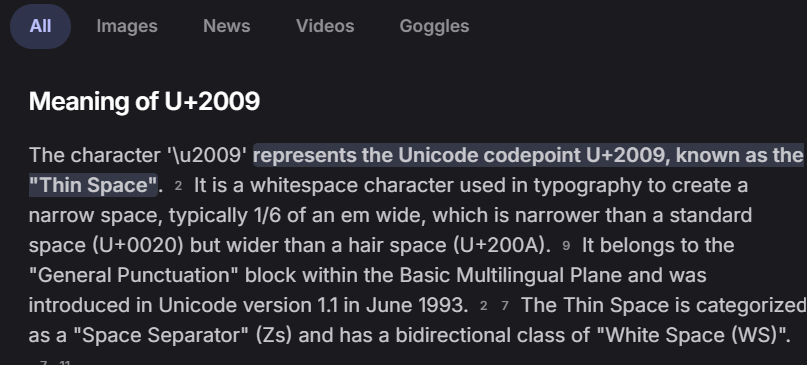

In [102]:
df1['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ')

0        [3.2, GHz]
1        [2.2, GHz]
2        [2.4, GHz]
3        [2.2, GHz]
4        [2.6, GHz]
5        [2.2, GHz]
6       [3.22, GHz]
7        [2.6, GHz]
8        [2.5, GHz]
9          [3, GHz]
10       [2.2, GHz]
11       [2.2, GHz]
12       [2.6, GHz]
13       [2.2, GHz]
14       [3.2, GHz]
15      [3.22, GHz]
16       [2.3, GHz]
17       [3.2, GHz]
18      [2.85, GHz]
19         [2, GHz]
20       [3.2, GHz]
21         [3, GHz]
22       [2.2, GHz]
23         [2, GHz]
24       [3.2, GHz]
25      [2.84, GHz]
26       [2.2, GHz]
27              NaN
28         [2, GHz]
29       [3.2, GHz]
30       [2.2, GHz]
31       [2.4, GHz]
32       [2.2, GHz]
33      [2.65, GHz]
34       [2.4, GHz]
35       [2.9, GHz]
36       [2.2, GHz]
37         [3, GHz]
38      [2.36, GHz]
39       [2.4, GHz]
40       [2.2, GHz]
41       [2.2, GHz]
42       [2.4, GHz]
43       [2.6, GHz]
44       [2.4, GHz]
45       [2.4, GHz]
46       [2.4, GHz]
47       [1.8, GHz]
48       [2.3, GHz]
49      [2.36, GHz]


In [103]:
df1['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)

0       3.20
1       2.20
2       2.40
3       2.20
4       2.60
5       2.20
6       3.22
7       2.60
8       2.50
9       3.00
10      2.20
11      2.20
12      2.60
13      2.20
14      3.20
15      3.22
16      2.30
17      3.20
18      2.85
19      2.00
20      3.20
21      3.00
22      2.20
23      2.00
24      3.20
25      2.84
26      2.20
27       NaN
28      2.00
29      3.20
30      2.20
31      2.40
32      2.20
33      2.65
34      2.40
35      2.90
36      2.20
37      3.00
38      2.36
39      2.40
40      2.20
41      2.20
42      2.40
43      2.60
44      2.40
45      2.40
46      2.40
47      1.80
48      2.30
49      2.36
50      2.40
51      3.10
52      2.20
53      2.20
54      2.20
55      2.40
56      3.22
57      2.05
58      3.20
59      2.40
60      2.00
61      3.20
62      2.40
63      2.00
64      2.40
65      3.10
66      3.00
67      2.60
68      2.20
69      3.20
70      2.30
71      2.50
72      2.00
73      3.20
74      2.20
75      2.00
76      3.22

In [104]:
df1['processor_speed'] = df1['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\825004774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processor_speed'] = df1['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)


In [105]:
df1.sample(2)
# so far, we have treated all columns beginning from brand_name upto proc_speed
# now we will do the remaining ones - ram, battery, display, camera, card and os

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,display,camera,card,os
686,688,iqoo,iQOO Neo 7 Racing Edition,32990,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",True,True,True,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.2,"8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.78 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v13
466,468,nokia,Nokia G11 Plus,10499,70.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Unisoc T606, Octa Core, 1.6 GHz Processor",Unisoc T606,unisoc,Octa Core,1.6,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.52 inches, 720 x 1600 px, 90 Hz Display with...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v12


### Cleaning (2-B phase)- 

In [106]:
df1.sample(2)

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,display,camera,card,os
709,711,oppo,OPPO X 2021,134999,86.0,"Single Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Snapdragon 865, Octa Core, 2.84 GHz Processor",Snapdragon 865,snapdragon,Octa Core,2.84,"8 GB RAM, 256 GB inbuilt",4000 mAh Battery with 45W Fast Charging,"7.4 inches, 1440 x 3200 px Display",64 MP + 16 MP + 12 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v11
452,454,vivo,Vivo Y53s,15490,79.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Helio G80, Octa Core, 2 GHz Processor",Helio G80,helio,Octa Core,2.00,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 19W Fast Charging,"6.58 inches, 1080 x 2408 px Display with Water...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v11


In [ ]:
df1['ram'].str.strip().str.split(' ').str.get(0).str.split(' ')
# same problem - unicode

0        [12 GB]
1         [6 GB]
2         [4 GB]
3         [6 GB]
4         [6 GB]
5         [6 GB]
6         [6 GB]
7         [8 GB]
8         [8 GB]
9         [8 GB]
10        [6 GB]
11        [8 GB]
12        [6 GB]
13        [6 GB]
14        [8 GB]
15        [4 GB]
16        [3 GB]
17       [16 GB]
18        [8 GB]
19        [4 GB]
20        [8 GB]
21        [8 GB]
22        [6 GB]
23        [4 GB]
24       [12 GB]
25        [8 GB]
26        [8 GB]
27        [6 GB]
28        [8 GB]
29        [8 GB]
30        [8 GB]
31        [6 GB]
32        [8 GB]
33        [4 GB]
34        [6 GB]
35        [8 GB]
36        [8 GB]
37       [12 GB]
38        [6 GB]
39        [8 GB]
40        [6 GB]
41        [6 GB]
42        [6 GB]
43        [8 GB]
44        [8 GB]
45        [6 GB]
46        [4 GB]
47        [3 GB]
48        [4 GB]
49        [8 GB]
50        [6 GB]
51        [8 GB]
52        [4 GB]
53        [6 GB]
54        [4 GB]
55        [4 GB]
56        [6 GB]
57        [6 GB]
58        [8 G

In [ ]:
# using regex -
df1['ram'].str.strip().str.split(',').str.get(0).str.findall(r'\b(\d+)\b').str.get(0)

0        12
1         6
2         4
3         6
4         6
5         6
6         6
7         8
8         8
9         8
10        6
11        8
12        6
13        6
14        8
15        4
16        3
17       16
18        8
19        4
20        8
21        8
22        6
23        4
24       12
25        8
26        8
27        6
28        8
29        8
30        8
31        6
32        8
33        4
34        6
35        8
36        8
37       12
38        6
39        8
40        6
41        6
42        6
43        8
44        8
45        6
46        4
47        3
48        4
49        8
50        6
51        8
52        4
53        6
54        4
55        4
56        6
57        6
58        8
59        4
60        6
61        8
62        6
63        6
64        6
65        8
66        8
67       12
68        4
69        8
70        3
71       12
72        4
73        8
74        6
75        4
76        6
77        8
78        6
79        4
80        6
81        8
82        4
83  

In [113]:
ram_capacity = df1['ram'].str.strip().str.split(',').str.get(0).str.findall(r'\b(\d+)\b').str.get(0)

In [114]:
df1.insert(16,'ram_capacity',ram_capacity)

In [115]:
internal_memory = df1['ram'].str.strip().str.split(',').str.get(1).str.strip().str.findall(r'\b(\d+)\b').str.get(0)
df1.insert(17,'internal_memory',internal_memory)

In [ ]:
df1['ram_capacity'].value_counts()
# check for strange ram values

ram_capacity
8      339
6      234
4      215
12      85
3       54
2       32
16       9
1        7
64       3
18       2
512      2
Name: count, dtype: int64

In [ ]:
df1[df1['ram_capacity'] == '1']
# all cheap phones with 1gb ram no issues

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,num_cores,processor_speed,ram,battery,ram_capacity,internal_memory,display,camera,card,os
399,401,itel,itel P36,6490,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Spreadtrum SC7731E, Quad Core, 1.3 GHz Processor",...,Quad Core,1.3,"1 GB RAM, 16 GB inbuilt",5000 mAh Battery,1,16,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP + 0.3 MP Dual Rear & 8 MP Front Camera,Memory Card Not Supported,Android v9.0 (Pie)
477,479,vivo,Vivo Y25,7499,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Helio MT6580, Quad Core, 1.3 GHz Processor",...,Quad Core,1.3,"1 GB RAM, 16 GB inbuilt",1900 mAh Battery,1,16,"4.5 inches, 480 x 854 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v5.1 (Lollipop)
735,737,tecno,Tecno Pop 5 Go,6999,NaN,"Dual Sim, 3G, Wi-Fi",False,False,False,"Spreadtrum SC7731, Quad Core, 1.3 GHz Processor",...,Quad Core,1.3,"1 GB RAM, 16 GB inbuilt",4000 mAh Battery,1,16,"6.1 inches, 720 x 1520 px Display with Water D...",5 MP + 0.3 MP Dual Rear & 5 MP Front Camera,Memory Card Supported,Android v11
744,746,itel,itel S16,5990,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Unisoc SC7731E, Quad Core, 1.3 GHz Processor",...,Quad Core,1.3,"1 GB RAM, 16 GB inbuilt",4000 mAh Battery,1,16,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP + 2 MP + 0.3 MP Triple Rear & 8 MP Front ...,"Memory Card Supported, upto 32 GB",Android v10
794,796,itel,itel A56,5490,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Quad Core, 1.3 GHz Processor",...,Quad Core,1.3,"1 GB RAM, 16 GB inbuilt",4000 mAh Battery,1,16,"6 inches, 720 x 1600 px Display",8 MP Dual Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Android v9.0 (Pie)
856,858,samsung,Samsung Galaxy A01 Core,4999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"(28 nm), Quad Core, 1.5 GHz Processor",...,Quad Core,1.5,"1 GB RAM, 16 GB inbuilt",3000 mAh Battery,1,16,"5.3 inches, 720 x 1480 px Display",8 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v10
907,909,itel,Itel A23 Pro,3999,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Spreadtrum SC9832E , Quad Core, 1.4 GHz Processor",...,Quad Core,1.4,"1 GB RAM, 8 GB inbuilt",2400 mAh Battery,1,8,"5 inches, 854 x 480 px Display",5 MP Rear & 2 MP Front Camera,Memory Card Not Supported,Android v10


In [120]:
# convert this col to numeric so relational comp are possible - 
df1['ram_capacity'] = df1['ram_capacity'].astype(float)

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\1458672256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ram_capacity'] = df1['ram_capacity'].astype(float)


In [123]:
df1[df1['ram_capacity'] > 18]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,num_cores,processor_speed,ram,battery,ram_capacity,internal_memory,display,camera,card,os
439,441,apple,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",...,Hexa Core,3.22,64 GB inbuilt,None,64.0,NaN,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
483,485,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster",False,True,True,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",...,Octa Core,3.20,512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,512.0,NaN,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
486,488,nokia,Nokia 8000 4G,6899,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Snapdragon 210, Quad Core, 1.1 GHz Processor",...,Quad Core,1.10,"512 MB RAM, 4 GB inbuilt",1500 mAh Battery,512.0,4,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,NaN
627,629,nokia,Nokia 225 4G,3589,NaN,"Dual Sim, 3G, 4G, VoLTE",False,False,False,Unisoc T117,...,NaN,NaN,"64 MB RAM, 128 MB inbuilt",1150 mAh Battery,64.0,128,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",RTOS (Series 30+)
762,764,apple,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",...,Hexa Core,3.22,64 GB inbuilt,None,64.0,NaN,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16


In [124]:
df1.loc[[439,762],['ram_capacity']] = [4.0,4.0]

In [125]:
df1.loc[483,['ram_capacity','internal_memory']] = [12.0,'512']

In [ ]:
df1[df1['ram_capacity'] > 18]
# both have ram in mb, they are feature phones

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,num_cores,processor_speed,ram,battery,ram_capacity,internal_memory,display,camera,card,os
486,488,nokia,Nokia 8000 4G,6899,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Snapdragon 210, Quad Core, 1.1 GHz Processor",...,Quad Core,1.1,"512 MB RAM, 4 GB inbuilt",1500 mAh Battery,512.0,4,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,NaN
627,629,nokia,Nokia 225 4G,3589,NaN,"Dual Sim, 3G, 4G, VoLTE",False,False,False,Unisoc T117,...,NaN,NaN,"64 MB RAM, 128 MB inbuilt",1150 mAh Battery,64.0,128,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",RTOS (Series 30+)


In [127]:
df1.drop([486,627], inplace = True)

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\2118134091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([486,627], inplace = True)


In [130]:
df1['internal_memory'] = df1['internal_memory'].astype(float)

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\3988935729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['internal_memory'] = df1['internal_memory'].astype(float)


In [131]:
df1['internal_memory'].value_counts()

internal_memory
128.0    523
64.0     191
256.0    157
32.0      67
512.0     22
16.0      12
1.0        5
8.0        1
Name: count, dtype: int64

In [ ]:
df1[df1['internal_memory'] < 32]
# rest are fine, check out for 1 TB ones

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,num_cores,processor_speed,ram,battery,ram_capacity,internal_memory,display,camera,card,os
290,292,apple,Apple iPhone 14 Pro Max (1TB),182999,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A16, Hexa Core Processor",...,Hexa Core,NaN,"6 GB RAM, 1 TB inbuilt",4323 mAh Battery with Fast Charging,6.0,1.0,"6.7 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16
399,401,itel,itel P36,6490,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Spreadtrum SC7731E, Quad Core, 1.3 GHz Processor",...,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",5000 mAh Battery,1.0,16.0,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP + 0.3 MP Dual Rear & 8 MP Front Camera,Memory Card Not Supported,Android v9.0 (Pie)
477,479,vivo,Vivo Y25,7499,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Helio MT6580, Quad Core, 1.3 GHz Processor",...,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",1900 mAh Battery,1.0,16.0,"4.5 inches, 480 x 854 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v5.1 (Lollipop)
574,576,vivo,Vivo Y71,25000,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Snapdragon 425, Quad Core, 1.4 GHz Processor",...,Quad Core,1.40,"3 GB RAM, 16 GB inbuilt",3360 mAh Battery,3.0,16.0,"6 inches, 720 x 1440 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v8.1 (Oreo)
735,737,tecno,Tecno Pop 5 Go,6999,NaN,"Dual Sim, 3G, Wi-Fi",False,False,False,"Spreadtrum SC7731, Quad Core, 1.3 GHz Processor",...,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",4000 mAh Battery,1.0,16.0,"6.1 inches, 720 x 1520 px Display with Water D...",5 MP + 0.3 MP Dual Rear & 5 MP Front Camera,Memory Card Supported,Android v11
738,740,nokia,Nokia C01 Plus,5249,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Unisoc SC9863A, Octa Core, 1.6 GHz Processor",...,Octa Core,1.60,"2 GB RAM, 16 GB inbuilt",3000 mAh Battery,2.0,16.0,"5.45 inches, 720 x 1440 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v11
744,746,itel,itel S16,5990,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Unisoc SC7731E, Quad Core, 1.3 GHz Processor",...,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",4000 mAh Battery,1.0,16.0,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP + 2 MP + 0.3 MP Triple Rear & 8 MP Front ...,"Memory Card Supported, upto 32 GB",Android v10
781,783,apple,Apple iPhone 13 Pro Max (1TB),179900,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",...,Hexa Core,3.22,"6 GB RAM, 1 TB inbuilt",4352 mAh Battery with Fast Charging,6.0,1.0,"6.7 inches, 1284 x 2778 px, 120 Hz Display wit...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
794,796,itel,itel A56,5490,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Quad Core, 1.3 GHz Processor",...,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",4000 mAh Battery,1.0,16.0,"6 inches, 720 x 1600 px Display",8 MP Dual Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Android v9.0 (Pie)
814,816,apple,Apple iPhone 14 Pro (1TB),172999,77.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A16, Hexa Core Processor",...,Hexa Core,NaN,"6 GB RAM, 1 TB inbuilt",3200 mAh Battery with Fast Charging,6.0,1.0,"6.1 inches, 1179 x 2556 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16


In [ ]:
df1[df1['internal_memory'] == 1]
# needs to replaced with 1024 GB

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,num_cores,processor_speed,ram,battery,ram_capacity,internal_memory,display,camera,card,os
290,292,apple,Apple iPhone 14 Pro Max (1TB),182999,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A16, Hexa Core Processor",...,Hexa Core,NaN,"6 GB RAM, 1 TB inbuilt",4323 mAh Battery with Fast Charging,6.0,1.0,"6.7 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16
781,783,apple,Apple iPhone 13 Pro Max (1TB),179900,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",...,Hexa Core,3.22,"6 GB RAM, 1 TB inbuilt",4352 mAh Battery with Fast Charging,6.0,1.0,"6.7 inches, 1284 x 2778 px, 120 Hz Display wit...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
814,816,apple,Apple iPhone 14 Pro (1TB),172999,77.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A16, Hexa Core Processor",...,Hexa Core,NaN,"6 GB RAM, 1 TB inbuilt",3200 mAh Battery with Fast Charging,6.0,1.0,"6.1 inches, 1179 x 2556 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16
943,945,samsung,Samsung Galaxy Z Fold 4 (12GB RAM + 1TB),163980,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",...,Octa Core,3.20,"12 GB RAM, 1 TB inbuilt",4400 mAh Battery with 25W Fast Charging,12.0,1.0,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Memory Card Not Supported,Android v12
961,963,apple,Apple iPhone 13 Pro (1TB),147900,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",...,Hexa Core,3.22,"6 GB RAM, 1 TB inbuilt",3095 mAh Battery with Fast Charging,6.0,1.0,"6.1 inches, 1170 x 2532 px, 120 Hz Display wit...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15.0


In [134]:
temp_df = df1[df1['internal_memory'] == 1]

In [135]:
df1.loc[temp_df.index,'internal_memory'] = 1024

In [136]:
battery_capacity = df1['battery'].str.strip().str.split('with').str.get(0).str.strip().str.findall(r'\b(\d+)\b').str.get(0).astype(float)
df1.insert(16,'battery_capacity',battery_capacity)

In [137]:
fast_charging = df1['battery'].str.strip().str.split('with').str.get(1).str.strip().str.findall(r'\d{2,3}')
df1.insert(17,'fast_charging',fast_charging)

In [154]:
df1['fast_charging'].value_counts()

fast_charging
[33]     152
[18]     128
[]        68
[67]      65
[25]      53
[120]     46
[15]      43
[80]      42
[66]      37
[10]      33
[30]      32
[65]      30
[44]      23
[45]      17
[20]      10
[68]       8
[100]      7
[150]      7
[125]      6
[22]       5
[40]       5
[60]       4
[55]       3
[210]      2
[50]       2
[21]       2
[180]      1
[200]      1
[240]      1
[135]      1
[19]       1
[165]      1
[27]       1
Name: count, dtype: int64

In [159]:
df1['fast_charging'].isnull().sum()

np.int64(143)

In [194]:
type(df1['fast_charging'][0])

list

In [192]:
type(df1['fast_charging'][0][0])

str

In [251]:
def fast_charging_extractor(item):

  if type(item) == list:
    if len(item) == 1:
      return item[0]
    else:
      return 0
  else:
    return -1

In [253]:
df1['fast_charging'] = df1['fast_charging'].apply(fast_charging_extractor).astype(int)

C:\Users\preet\AppData\Local\Temp\ipykernel_6204\3894870647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fast_charging'] = df1['fast_charging'].apply(fast_charging_extractor).astype(int)


In [ ]:
screen_size = df1['display'].str.strip().str.split(',').str.get(0).str.strip().str.split(' ').str.get(0).astype(float)
df1.insert(21,'screen_size',screen_size)
# mistakenly executed twice no error in actualness

ValueError: cannot insert screen_size, already exists

In [259]:
resolution = df1['display'].str.strip().str.split(',').str.get(1).str.strip().str.split('px').str.get(0)
df1.insert(22,'resolution',resolution)

In [260]:
refresh_rate = df1['display'].str.strip().str.split(',').str.get(2).str.strip().str.findall(r'\d{2,3}').str.get(0).apply(lambda x: 60 if pd.isna(x) else x).astype(int)
df1.insert(22,'refresh_rate',refresh_rate)

In [261]:
def camera_extractor(text):

  if 'Quad' in text:
    return '4'
  elif 'Triple' in text:
    return '3'
  elif 'Dual' in text:
    return '2'
  elif 'Missing' in text:
    return 'Missing'
  else:
    return '1'

In [262]:
num_rear_cameras = df1['camera'].str.strip().str.split('&').str.get(0).apply(camera_extractor)
df1.insert(25,'num_rear_cameras',num_rear_cameras)

In [263]:
num_front_cameras = df1['camera'].str.strip().str.split('&').str.get(1).str.strip().fillna('Missing').apply(camera_extractor)
df1.insert(26,'num_front_cameras',num_front_cameras)

In [266]:
df1.tail(2)

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os
1018,1020,motorola,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,128.0,"6.8 inches, 1080 x 2400 px Display with Punch ...",6.8,60,1080 x 2400,108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,3,1,"Memory Card Supported, upto 1 TB",Android v12
1019,1021,samsung,Samsung Galaxy M52s 5G,24990,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,Octa Core Processor,...,128.0,"6.5 inches, 1080 x 2400 px Display with Water ...",6.5,60,1080 x 2400,64 MP + 8 MP + 5 MP Triple Rear & 32 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v12


### Cleaning (2-C phase)- 